## 0. Basic knowledge of feature engineering

In [1]:
## Question 1: A good feature should be representative and discriminative.

In [2]:
## Question 2: Why is image feature extraction hard? 
"""
Firstly, an image is equivalently a high-dimensional tensor. Extracting low-dimensional feature vectors from 
a high-dimensional tensor is very hard.   
Secondly, there are many factors that can interfere with the feature extraction, such as background clutter,
deformation, flipping, viewpoint variation, intra-class variation, illumination conditions, occlusion and scale 
variation.
"""

'\nFirstly, an image is equivalently a high-dimensional tensor. Extracting low-dimensional feature vectors from \na high-dimensional tensor is very hard.   \nSecondly, there are many factors that can interfere with the feature extraction, such as background clutter,\ndeformation, flipping, viewpoint variation, intra-class variation, illumination conditions, occlusion and scale \nvariation.\n'

In [3]:
## Question 3: As we have learned in class, both 'Maximum entropy' and 'Smallest margin' can be used to
##             measure uncertainty in active learning. Please explain which one is better for active learning and why?
##             Note that: this is an open question and you can answer in Chinese as well.
"""        
I think 'Maximum entropy' is better for active learning. 
Firstly, this algorithm takes all the possible conditions 
into account, so the uncertainty that it gives describes the global condition, not the local condition. Therefore,  
it is more comprehensive and more robust. Secondly, the local condition of uncertainty is implicitly included in this 
algorithm. A point with high uncertainty measured in 'Smallest margin' algorithm will also have high uncertainty in 
'Maximum entropy' algorithm. On contrary, a point with high uncertainty measured in 'Maximum entropy' algorithm may not 
have high uncertainty in 'Smallest margin' algorithm. If the sample set is not good enough, some important cases can be 
ignored if we use the 'Smallest margin' algorithm. Thirdly, both algorithms have essentially the same time complexity 
although the expression of the former one seems more complex. Therefore, I think 'Maximum entropy' is better.

""" 

"        \nI think 'Maximum entropy' is better for active learning. \nFirstly, this algorithm takes all the possible conditions \ninto account, so the uncertainty that it gives describes the global condition, not the local condition. Therefore,  \nit is more comprehensive and more robust. Secondly, the local condition of uncertainty is implicitly included in this \nalgorithm. A point with high uncertainty measured in 'Smallest margin' algorithm will also have high uncertainty in \n'Maximum entropy' algorithm. On contrary, a point with high uncertainty measured in 'Maximum entropy' algorithm may not \nhave high uncertainty in 'Smallest margin' algorithm. If the sample set is not good enough, some important cases can be \nignored if we use the 'Smallest margin' algorithm. Thirdly, both algorithms have essentially the same time complexity \nalthough the expression of the former one seems more complex. Therefore, I think 'Maximum entropy' is better.\n\n"

## 1. Text feature engineering

In [4]:
## Given a corpus as:
corpus = ['The goal of this lecture is to explain text processing.',
          'The bag of words model is one such approach.',
          'Text processing via bag of words.',
          'Data science includes text processing']

In [5]:
# !pip3 install sklearn
## Question 4: Use BOW to extract features of the given corpus. 
## 
## Your code here
## 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 15)	1
  (0, 4)	1
  (0, 9)	1
  (0, 16)	1
  (0, 7)	1
  (0, 6)	1
  (0, 17)	1
  (0, 3)	1
  (0, 14)	1
  (0, 11)	1
  (1, 15)	1
  (1, 9)	1
  (1, 6)	1
  (1, 1)	1
  (1, 19)	1
  (1, 8)	1
  (1, 10)	1
  (1, 13)	1
  (1, 0)	1
  (2, 9)	1
  (2, 14)	1
  (2, 11)	1
  (2, 1)	1
  (2, 19)	1
  (2, 18)	1
  (3, 14)	1
  (3, 11)	1
  (3, 2)	1
  (3, 12)	1
  (3, 5)	1


In [6]:
## Question 5: Use TFIDF to extract features of the given corpus. 
## 
## Your code here
## 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 11)	0.23360869991447142
  (0, 14)	0.23360869991447142
  (0, 3)	0.3659931706709981
  (0, 17)	0.3659931706709981
  (0, 6)	0.2885532196006135
  (0, 7)	0.3659931706709981
  (0, 16)	0.3659931706709981
  (0, 9)	0.23360869991447142
  (0, 4)	0.3659931706709981
  (0, 15)	0.2885532196006135
  (1, 0)	0.38086516913285073
  (1, 13)	0.38086516913285073
  (1, 10)	0.38086516913285073
  (1, 8)	0.38086516913285073
  (1, 19)	0.30027847400958324
  (1, 1)	0.30027847400958324
  (1, 6)	0.30027847400958324
  (1, 9)	0.24310130388692774
  (1, 15)	0.30027847400958324
  (2, 18)	0.5371830325370646
  (2, 19)	0.4235212730041086
  (2, 1)	0.4235212730041086
  (2, 11)	0.3428769712206024
  (2, 14)	0.3428769712206024
  (2, 9)	0.3428769712206024
  (3, 5)	0.5119917161748856
  (3, 12)	0.5119917161748856
  (3, 2)	0.5119917161748856
  (3, 11)	0.3267976803045626
  (3, 14)	0.3267976803045626


In [7]:
## Question 6: Use Word2Vec to extract features of the given corpus.
# !pip3 install gensim
from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer

# Create a model to represent each word by a 10 dimensional vector
model = W2VTransformer(size=10, min_count=1, seed=1)


## The model trained on the common_texts
# What is the vector representation of the word ‘graph’?
# wordvecs = model.fit(common_texts).transform(['graph'])
# print(wordvecs)
# wordvecs
##
## You should extract the vector representation of the word 'text' by the model trained on the given corpus.
## Note that: the formulation of the given corpus is different from that of common_texts,
## you should transform the given corpus to the the formulation of common_texts first.
##
## Your code here
##

def sentenceToWordList(sentence: str):
    words = sentence.split(' ')
    words = [x.strip('.').lower() for x in words]
    return words


w2vCorpus = [sentenceToWordList(x) for x in corpus]
model = model.fit(w2vCorpus)
wordvecs = model.transform(['text'])
wordvecs

array([[-0.00282444,  0.04010464, -0.04006686, -0.0359363 , -0.02909481,
        -0.01563334,  0.0435893 , -0.02209093, -0.029308  ,  0.04068261]],
      dtype=float32)

## 2. Time series feature engineering

In [16]:
## Question 7: Use decompose (model='additive') to extract time series features of the given time series
from random import randrange
import math
from pandas import Series
series = Series([20*math.sin(i/18*math.pi) + i + randrange(10) for i in range(1,360)])

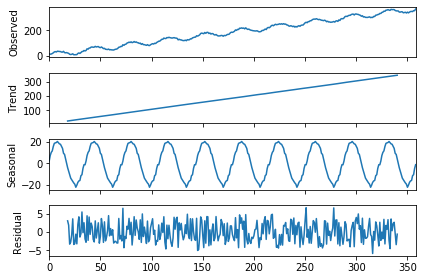

In [17]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
##
## Your code here
##
result = seasonal_decompose(series, model='additive',freq=36)  # freq=36 to match the period 
result.plot()
plt.show()

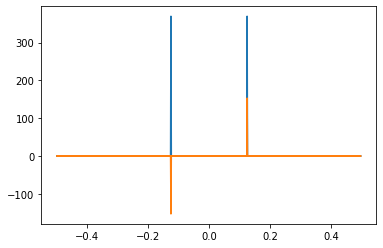

In [14]:
## Question 8: Use Discrete Fourier Transform (DFT) to extract time series features of the given time series
import numpy as np
series = Series([np.cos(2*math.pi*1/8*n+math.pi/8) for n in range(800)])
## 
## Your code here
## 
import numpy as np
sp = np.fft.fft(series)
freq = np.fft.fftfreq(series.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()


Analysis:
$$ f(n) = \frac{1}{2}(\cos\frac{\pi}{8}-i\sin\frac{\pi}{8})e^{i(-\frac{2\pi}{8})n} + \frac{1}{2}(\cos\frac{\pi}{8}+i\sin\frac{\pi}{8})e^{i\frac{2\pi}{8}n}$$
Two frequencies: $-\frac{1}{8}$ and $\frac{1}{8}$

Count of n: 800

The two tall blue lines indicates the real part(corresponding to 'cos'), the y-values are both approximately equal to $800*\frac{1}{2}\cos\frac{\pi}{8}\approx 370$. 

The two short vertical orange lines indicates the image part(corresponding to 'sin'), the y-values are opposite and there absolute values are approximately equal to $800*\frac{1}{2}\sin\frac{\pi}{8}\approx 153$

## 3. Image feature engineering

In [11]:
## Use SIFT in opencv-python to extract image features on the given image 'morning.jpg'
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16
## Note that: NOT all versions of opencv-contrib-python includes SIFT in cv2.xfeatures2d, 
## but this specified version does
import cv2
import numpy as np
name = 'dog.jpg'
img = cv2.imread(name)
gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("The shape of the image: ", gray_img.shape)
siftDetector= cv2.xfeatures2d.SIFT_create()
## Note that: SIFT was re-organized in opencv thus you should import it like this.

## finds the keypoint in the images
kp = siftDetector.detect(gray_img,None)
## draws the small circles on the locations of keypoints
cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoint_' + name, img) ## Save Example
## directly find keypoints and descriptors in a single step 
kp, des = siftDetector.detectAndCompute(gray_img,None)
print("The shape of feature description: ", des.shape)

The shape of the image:  (485, 729)
The shape of feature description:  (418, 128)


In [12]:
## Question 9: Please rescale the given image 'dog.jpg' at a random ratio between 0.3 with 1.5.
##          Note that: the width and height of the given image should be rescaled at a different ratio.
##          Repeat this operation five times, then you will get five new images with different scale.
##
##          Please extract the SIFT features of these images respectively and use 'imwrite' to save them.
##          An example of saving keypoints on the input image is shown as follow:
##          cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
##          cv2.imwrite('sift_keypoint_' + name, img)
##
## 
## Your code here
## 
import cv2
import random
name = 'dog.jpg'
src_img = cv2.imread(name)
siftDetector = cv2.xfeatures2d.SIFT_create()
for i in range(5):
    s1 = random.uniform(0.3, 1.5)
    s2 = random.uniform(0.3, 1.5)
    nh = int(s1 * src_img.shape[0])
    nw = int(s2 * src_img.shape[1])
    img = cv2.resize(src_img, (nw, nh))
    # randomly resize the image
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = siftDetector.detect(gray_img, None)
    cv2.drawKeypoints(gray_img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imwrite(f'sift_keypoint_scale_{i}_{name}', img)  
    
# Results of observation:
# In general, most of the key points remain the same after scaling, but there are still a small amount of 
# key points that are different. The directions of vectors of most key points remain consistent after 
# scaling, but there are still some small differences.
# The differences may be caused by pixel loses in the process of scaling.

In [13]:
## Question 10: Please rotate the given image 'dog.jpg' 30, 60, 90, 120, 150, 180 degrees clockwise,
##              then you will get six new images with different rotation angle.
##              Please extract the SIFT features of these images respectively and use 'imwrite' to save them.
##              An example of saving keypoints on the input image is shown as follow:
##              cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
##              cv2.imwrite('sift_keypoint_' + name, img)
import cv2
def getTransMatAndNewSize(angle, width, height):
    """
    Gets the transformation matrix and new image size that fits the rotated image properly. 
    """
    alpha = math.radians(angle)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    nw = int(width * abs(math.cos(alpha)) + height * abs(math.sin(alpha)))
    nh = int(height * abs(math.cos(alpha)) + width * abs(math.sin(alpha)))
    dx = nw / 2 - center[0]
    dy = nh / 2 - center[1]
    M[0, 2] += dx
    M[1, 2] += dy
    return M, (nw, nh)

name = 'dog.jpg'
src_img = cv2.imread(name)
siftDetector = cv2.xfeatures2d.SIFT_create()
width = src_img.shape[1]
height = src_img.shape[0]
center = (width / 2, height / 2)
for i in range(6):
    angle = -(i * 30 + 30) # clockwise
    M, nSize = getTransMatAndNewSize(angle, width, height)
    img = cv2.warpAffine(src_img, M, nSize, borderValue=(255, 255, 255))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = siftDetector.detect(gray_img, None)
    cv2.drawKeypoints(gray_img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imwrite(f'sift_keypoint_rotate_{-angle}_{name}', img)
# Results of observation:
# Almost all key points remain the same after scaling, only several key points disappear.  
# The directions of vectors of almost all key points remain consistent after rotation.
# The differences may be caused by the differences of the margin sizes and pixel loses in rotation. 

